In [1]:
import numpy as np
import xarray as xr
import gcsfs
from matplotlib import pyplot as plt
from xgcm import Grid
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import colors as cols
import scipy.special as sp
from intake import open_catalog
import cmocean

In [2]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds01  = cat["channel_ridge_resolutions_01km"].to_dask()
ds05  = cat["channel_ridge_resolutions_05km"].to_dask()
ds20  = cat["channel_ridge_resolutions_20km"].to_dask()

In [3]:
plt.rcParams.update({'font.size': 16})

In [4]:
grid20 = Grid(ds20, periodic='X')
grid05 = Grid(ds05, periodic='X')
grid01 = Grid(ds01, periodic='X')

In [5]:
horispace01 = 1e3
horispace05 = 5e3
horispace20 = 20e3
time_index = 0
depth = -50
f =  -0.83e-4
daytime = 86400
alpha = 2e-4
gravity = 9.81
ybound = 5e5

In [6]:

depth = 0
vort01_0 = grid01.interp(grid01.interp((grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace01

strain01_0 = ((grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid01.interp(grid01.interp(grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace01




depth = 0
vort05_0 = grid05.interp(grid05.interp((grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace05

strain05_0 = ((grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid05.interp(grid05.interp(grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') + grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace05



depth = 0
vort20_0 = grid20.interp(grid20.interp((grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace20
strain20_0 = ((grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid20.interp(grid20.interp(grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') + grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace20

In [7]:
vortband01 = np.linspace(-7, 7, 240)
strainband01 = np.linspace(.5e-3, 7, 240)

ybound = 5e5

binbox01 =  (vortband01[1]-vortband01[0])*(strainband01[1]-strainband01[0])

vort_01_0 = (vort01_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_01_0 = (abs(strain01_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


hist01 = histogram(vort_01_0,strain_01_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hist01.load()


vort_05_0 = (vort05_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_05_0 = (abs(strain05_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')

hist05 = histogram(vort_05_0,strain_05_0,dim = ['XC','YC'], bins=[vortband01,strainband01])
hist05.load()


vort_20_0 = (vort20_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_20_0 = (abs(strain20_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


hist20 = histogram(vort_20_0,strain_20_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hist20.load()


<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [8]:
ds01

<xarray.Dataset>
Dimensions:              (XC: 2000, XG: 2000, YC: 2000, YG: 2000, Z: 76, Zl: 76, Zp1: 77, Zu: 76, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 35)
Coordinates:
    Depth                (YC, XC) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    PHrefC               (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF               (Zp1) float32 dask.array<chunksize=(77,), meta=np.ndarray>
  * XC                   (XC) float32 500.0 1.5e+03 2.5e+03 ... 1.998e+06 2e+06
  * XG                   (XG) float32 0.0 1e+03 2e+03 ... 1.998e+06 1.999e+06
  * YC                   (YC) float32 500.0 1.5e+03 2.5e+03 ... 1.998e+06 2e+06
  * YG                   (YG) float32 0.0 1e+03 2e+03 ... 1.998e+06 1.999e+06
  * Z                    (Z) float32 -0.5 -1.57 -2.79 ... -2.757e+03 -2.913e+03
  * Zl                   (Zl) float32 0.0 -1.0 -2.14 ... -2.689e+03 -2.825e+03
  * Zp1                  (Zp1) float32 0.0 -1.0 -2.14 ... -2.825e+03 -3e+03
  * Zu                   (Zu) float32 -1.0 -2.14 -3.44 ... -2.825e+03 -3e+03
    drC                  (Zp1) float32 dask.array<chunksize=(77,), meta=np.ndarray>
    drF                  (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    dxC                  (YC, XG) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    dxG                  (YG, XC) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    dyC                  (YG, XC) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    dyG                  (YC, XG) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    hFacC                (Z, YC, XC) float32 dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    hFacS                (Z, YG, XC) float32 dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    hFacW                (Z, YC, XG) float32 dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    iter                 (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * layer_1TH_bounds     (layer_1TH_bounds) float32 -0.2 0.0 0.2 ... 7.8 8.0 8.2
  * layer_1TH_center     (layer_1TH_center) float32 -0.1 0.1 0.3 ... 7.7 7.9 8.1
  * layer_1TH_interface  (layer_1TH_interface) float32 0.0 0.2 0.4 ... 7.8 8.0
    maskC                (Z, YC, XC) bool dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    maskS                (Z, YG, XC) bool dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    maskW                (Z, YC, XG) bool dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    rA                   (YC, XC) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    rAs                  (YG, XC) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    rAw                  (YC, XG) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    rAz                  (YG, XG) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
  * time                 (time) timedelta64[ns] 550 days 560 days ... 890 days
Data variables:
    Eta                  (time, YC, XC) float32 dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    PH                   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    PTRACER01            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    T                    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    U                    (time, Z, YC, XG) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    V                    (time, Z, YG, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    W                    (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>

In [10]:

# grid coarsing 1km->5km

temp_U = grid01.interp(ds01.U.sel(Z=0,method='nearest'),'X')
U_cg = temp_U

temp_V = grid01.interp(ds01.V.sel(Z=0,method='nearest'),'Y',boundary='extend')
V_cg = temp_V


temp_W = grid01.interp(ds01.W,'Z',boundary='extend').sel(Z=-100,method='nearest')
W_cg = temp_W

temp_tracer = ds01.PTRACER01.sel(Z=-100,method='nearest')
tracer_cg = temp_tracer



kil = 3

for i in range(1,kil):
    temp_U_shiftXp = temp_U.shift(XC=i)
    temp_U_shiftXn = temp_U.shift(XC=-i)
    temp_V_shiftXp = temp_V.shift(XC=i)
    temp_V_shiftXn = temp_V.shift(XC=-i)
    temp_W_shiftXp = temp_W.shift(XC=i)
    temp_W_shiftXn = temp_W.shift(XC=-i)
    temp_tracer_shiftXp = temp_tracer.shift(XC=i)
    temp_tracer_shiftXn = temp_tracer.shift(XC=-i)
    for j in range(1,kil):
        U_cg = (temp_U_shiftXp.shift(YC=i) + temp_U_shiftXp.shift(YC=-i) + temp_U_shiftXn.shift(YC=i) + temp_U_shiftXn.shift(YC=-i) + U_cg)
        V_cg = (temp_V_shiftXp.shift(YC=i) + temp_V_shiftXp.shift(YC=-i) + temp_V_shiftXn.shift(YC=i) + temp_V_shiftXn.shift(YC=-i) + V_cg)
        W_cg = (temp_W_shiftXp.shift(YC=i) + temp_W_shiftXp.shift(YC=-i) + temp_W_shiftXn.shift(YC=i) + temp_W_shiftXn.shift(YC=-i) + W_cg)
        tracer_cg = (temp_tracer_shiftXp.shift(YC=i) + temp_tracer_shiftXp.shift(YC=-i) + temp_tracer_shiftXn.shift(YC=i) + temp_tracer_shiftXn.shift(YC=-i) + tracer_cg)
    U_cg = U_cg + temp_U_shiftXp + temp_U_shiftXn
    V_cg = V_cg + temp_V_shiftXp + temp_V_shiftXn
    W_cg = W_cg + temp_W_shiftXp + temp_W_shiftXn
    tracer_cg = tracer_cg + temp_tracer_shiftXp + temp_tracer_shiftXn
    
U_cg = U_cg + temp_U.shift(YC=1) + temp_U.shift(YC=-1) + temp_U.shift(YC=2) + temp_U.shift(YC=-2)
V_cg = V_cg + temp_V.shift(YC=1) + temp_V.shift(YC=-1) + temp_V.shift(YC=2) + temp_V.shift(YC=-2)
W_cg = W_cg + temp_W.shift(YC=1) + temp_W.shift(YC=-1) + temp_W.shift(YC=2) + temp_W.shift(YC=-2)
tracer_cg = tracer_cg + temp_tracer.shift(YC=1) + temp_tracer.shift(YC=-1) + temp_tracer.shift(YC=2) + temp_tracer.shift(YC=-2)



U_cg = U_cg/(2*kil-1)**2
V_cg = V_cg/(2*kil-1)**2
W_cg = W_cg/(2*kil-1)**2
tracer_cg = tracer_cg/(2*kil-1)**2

In [11]:
U_cg_skip = U_cg[:,::5,::5]
V_cg_skip = V_cg[:,::5,::5]
W_cg_skip = W_cg[:,::5,::5]
tracer_cg_skip = tracer_cg[:,::5,::5]


In [12]:
U_cg_tempArray = xr.DataArray(U_cg_skip.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])
V_cg_tempArray = xr.DataArray(V_cg_skip.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])
W_cg_tempArray = xr.DataArray(W_cg_skip.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])
tracer_cg_tempArray = xr.DataArray(tracer_cg_skip.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])

In [13]:
### remove nan
U_cg05 = U_cg_tempArray.isel(XC=slice(1+kil,400-kil)).isel(YC=slice(1+kil,400-kil))
V_cg05 = V_cg_tempArray.isel(XC=slice(1+kil,400-kil)).isel(YC=slice(1+kil,400-kil))
W_cg05 = W_cg_tempArray.isel(XC=slice(1+kil,400-kil)).isel(YC=slice(1+kil,400-kil))
tracer_cg05 = tracer_cg_tempArray.isel(XC=slice(1+kil,400-kil)).isel(YC=slice(1+kil,400-kil))

In [14]:
grid05_cg = Grid(ds05.isel(XC=slice(1+kil,400-kil),XG=slice(1+kil,400-kil),YC=slice(1+kil,400-kil),YG=slice(1+kil,400-kil)), periodic='X')

In [15]:
vort05_cg = (grid05_cg.interp(grid05_cg.diff(V_cg05, 'X'),'X') - 
             grid05_cg.interp(grid05_cg.diff(U_cg05, 'Y', boundary='extend'),'Y', boundary='extend'))/horispace05

strain05_cg = ((grid05_cg.interp(grid05_cg.diff(V_cg05, 'X'),'X')+grid05_cg.interp(grid05_cg.diff(U_cg05, 'Y', boundary='extend'),'Y', boundary='extend'))**2 
              + (grid05_cg.interp(grid05_cg.diff(U_cg05, 'X'),'X') - grid05_cg.interp(grid05_cg.diff(V_cg05, 'Y', boundary='extend'),'Y', boundary='extend'))**2)**(0.5)/horispace05

In [16]:
vort_05_0_cg = (vort05_cg/f).sel(YC = slice(ybound,2e6-ybound)).rename('vort1_0')
strain_05_0_cg = (abs(strain05_cg/f)).sel(YC = slice(ybound,2e6-ybound)).rename('strain1_0')
hab05_cg = histogram(vort_05_0_cg,strain_05_0_cg,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab05_cg.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * time           (time) timedelta64[ns] 36010 days 06:00:00 ... 36350 days ...
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [19]:
wc_01_05_cg = (W_cg05*tracer_cg05).sel(YC = slice(ybound,2e6-ybound)).rename('wtracer1_0')

hab05_cg_flux = histogram(vort_05_0_cg, strain_05_0_cg, weights=wc_01_05_cg, dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab05_cg_flux.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time           (time) timedelta64[ns] 36010 days 06:00:00 ... 36350 days ...
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [20]:

# grid coarsing 1km->20km

temp_U = grid01.interp(ds01.U.sel(Z=0,method='nearest'),'X')
U_cg = temp_U

temp_V = grid01.interp(ds01.V.sel(Z=0,method='nearest'),'Y',boundary='extend')
V_cg = temp_V


temp_W = grid01.interp(ds01.W,'Z',boundary='extend').sel(Z=-100,method='nearest')
W_cg = temp_W

temp_tracer = ds01.PTRACER01.sel(Z=-100,method='nearest')
tracer_cg = temp_tracer




kil = 11

for i in range(1,kil):
    temp_U_shiftXp = temp_U.shift(XC=i)
    temp_U_shiftXn = temp_U.shift(XC=-i)
    temp_V_shiftXp = temp_V.shift(XC=i)
    temp_V_shiftXn = temp_V.shift(XC=-i)
    temp_W_shiftXp = temp_W.shift(XC=i)
    temp_W_shiftXn = temp_W.shift(XC=-i)
    temp_tracer_shiftXp = temp_tracer.shift(XC=i)
    temp_tracer_shiftXn = temp_tracer.shift(XC=-i)
    for j in range(1,kil):
        U_cg = (temp_U_shiftXp.shift(YC=i) + temp_U_shiftXp.shift(YC=-i) + temp_U_shiftXn.shift(YC=i) + temp_U_shiftXn.shift(YC=-i) + U_cg)
        V_cg = (temp_V_shiftXp.shift(YC=i) + temp_V_shiftXp.shift(YC=-i) + temp_V_shiftXn.shift(YC=i) + temp_V_shiftXn.shift(YC=-i) + V_cg)
        W_cg = (temp_W_shiftXp.shift(YC=i) + temp_W_shiftXp.shift(YC=-i) + temp_W_shiftXn.shift(YC=i) + temp_W_shiftXn.shift(YC=-i) + W_cg)
        tracer_cg = (temp_tracer_shiftXp.shift(YC=i) + temp_tracer_shiftXp.shift(YC=-i) + temp_tracer_shiftXn.shift(YC=i) + temp_tracer_shiftXn.shift(YC=-i) + tracer_cg)
    U_cg = U_cg + temp_U_shiftXp + temp_U_shiftXn
    V_cg = V_cg + temp_V_shiftXp + temp_V_shiftXn
    W_cg = W_cg + temp_W_shiftXp + temp_W_shiftXn
    tracer_cg = tracer_cg + temp_tracer_shiftXp + temp_tracer_shiftXn
    
    
for j in range(1, kil):
    U_cg = U_cg + temp_U.shift(YC=j) + temp_U.shift(YC=-j)
    V_cg = V_cg + temp_V.shift(YC=j) + temp_V.shift(YC=-j)
    W_cg = W_cg + temp_W.shift(YC=j) + temp_W.shift(YC=-j)
    tracer_cg = tracer_cg + temp_tracer.shift(YC=j) + temp_tracer.shift(YC=-j)



U_cg = U_cg/(2*kil-1)**2
V_cg = V_cg/(2*kil-1)**2
W_cg = W_cg/(2*kil-1)**2
tracer_cg = tracer_cg/(2*kil-1)**2


In [21]:
U_cg20_skip = U_cg[:,::20,::20]
V_cg20_skip = V_cg[:,::20,::20]
W_cg20_skip = W_cg[:,::20,::20]
tracer_cg20_skip = tracer_cg[:,::20,::20]

In [22]:
U_cg20_tempArray = xr.DataArray(U_cg20_skip.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])
V_cg20_tempArray = xr.DataArray(V_cg20_skip.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])
W_cg20_tempArray = xr.DataArray(W_cg20_skip.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])
tracer_cg20_tempArray = xr.DataArray(tracer_cg20_skip.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])

In [23]:
grid20_cg = Grid(ds20.isel(XC=slice(1+1,100-1),XG=slice(1+1,100-1),YC=slice(1+1,100-1),YG=slice(1+1,100-1)), periodic='X')

U_cg20 = U_cg20_tempArray.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))
V_cg20 = V_cg20_tempArray.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))
W_cg20 = W_cg20_tempArray.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))
tracer_cg20 = tracer_cg20_tempArray.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))

In [24]:
vort20_cg = (grid20_cg.interp(grid20_cg.diff(V_cg20,'X'),'X') - 
             grid20_cg.interp(grid20_cg.diff(U_cg20, 'Y', boundary='extend'),'Y', boundary='extend'))/horispace20

strain20_cg = ((grid20_cg.interp(grid20_cg.diff(V_cg20, 'X'),'X')+grid20_cg.interp(grid20_cg.diff(U_cg20, 'Y', boundary='extend'),'Y', boundary='extend'))**2 
              + (grid20_cg.interp(grid20_cg.diff(U_cg20, 'X'),'X') - grid20_cg.interp(grid20_cg.diff(V_cg20, 'Y', boundary='extend'),'Y', boundary='extend'))**2)**(0.5)/horispace20

In [25]:
vort_01_20_cg = (vort20_cg/f).sel(YC = slice(ybound,2e6-ybound)).rename('vort1_0')
strain_01_20_cg = (abs(strain20_cg/f)).sel(YC = slice(ybound,2e6-ybound)).rename('strain1_0')

hab20_cg = histogram(vort_01_20_cg,strain_01_20_cg, dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab20_cg.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [26]:
wc_01_20_cg = (W_cg20*tracer_cg20).sel(YC = slice(ybound,2e6-ybound)).rename('wtracer1_0')

hab20_cg_flux = histogram(vort_01_20_cg, strain_01_20_cg, weights=wc_01_20_cg, dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab20_cg_flux.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [28]:
girbNums01 = vort_01_0.XC.size*vort_01_0.YC.size
girbNums05 = vort_05_0.XC.size*vort_05_0.YC.size
girbNums20 = vort_20_0.XC.size*vort_20_0.YC.size

<ipython-input-30-4058231b01ec>:7: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp05.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
<ipython-input-30-4058231b01ec>:23: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp20.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
<ipython-input-30-4058231b01ec>:41: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp05cg.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
<ipython-input-30-4058231b01ec>:56: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp20cg.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')


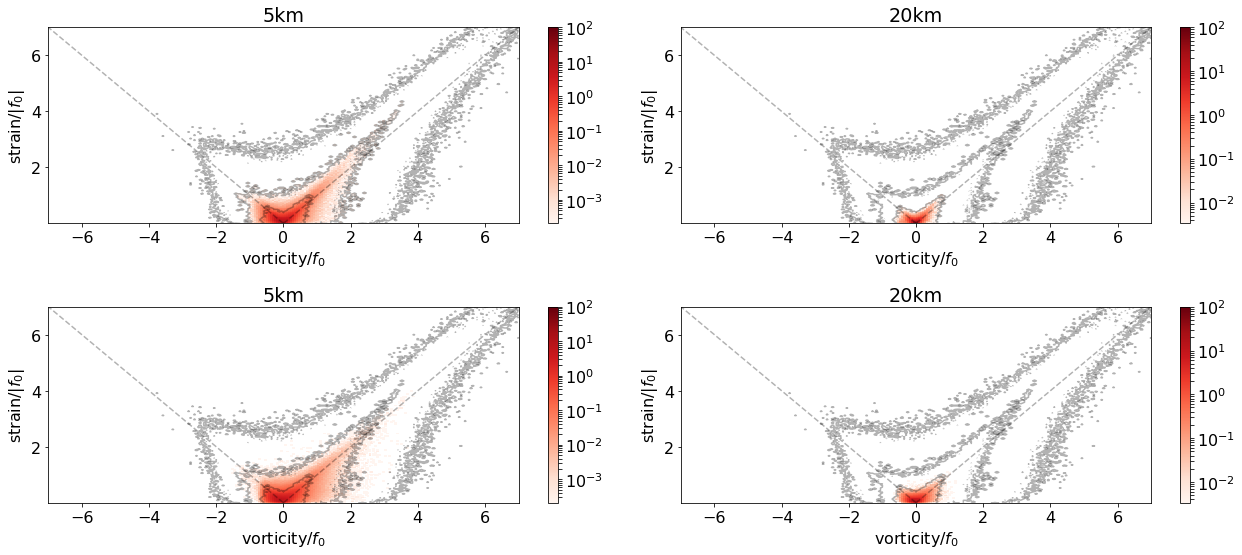

In [30]:
plt.figure(figsize=(18,8))

plt.subplot(221)
girbNums05 = len(vort_05_0.YC)*len(strain_05_0.XC)
temp05 = (1/(binbox01*girbNums05)*(hist05.rename('')).mean(dim='time').T)
temp05 = xr.where(temp05<1e-5,np.nan,temp05)
temp05.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.title('5km')
plt.plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')



plt.subplot(222)
girbNums20 = len(vort_20_0.YC)*len(strain_20_0.XC)
temp20 = (1/(binbox01*girbNums20)*(hist20.rename('')).mean(dim='time').T)
temp20 = xr.where(temp20<1e-5,np.nan,temp20)
temp20.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
# plt.contour(np.linspace(-3, 3, 49), np.linspace(.5e-3, 3, 49), binbox05*(5**2)*hab05_00.mean(dim='time').T, levels=[0.5e1,1.5e2,1e4],colors ='k')
plt.title('20km')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')




plt.subplot(223)
girbNums05 = len(vort_05_0.YC)*len(strain_05_0.XC)
temp05cg = (1/(binbox01*girbNums05)*(hab05_cg.rename('')).mean(dim='time').T)
temp05cg = xr.where(temp05cg<1e-5,np.nan,temp05cg)
temp05cg.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.title('5km')
plt.plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')


plt.subplot(224)
girbNums20 = len(vort_20_0.YC)*len(strain_20_0.XC)
temp20cg = (1/(binbox01*girbNums20)*(hab20_cg.rename('')).mean(dim='time').T)
temp20cg = xr.where(temp20cg<1e-5,np.nan,temp20cg)
temp20cg.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
# plt.contour(np.linspace(-3, 3, 49), np.linspace(.5e-3, 3, 49), binbox05*(5**2)*hab05_00.mean(dim='time').T, levels=[0.5e1,1.5e2,1e4],colors ='k')
plt.title('20km')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')



plt.tight_layout()

In [32]:
hist01_wc100 = xr.open_dataarray('hist01_wc100')
hist05_wc150 = xr.open_dataarray('hist05_wc150')
hist20_wc180 = xr.open_dataarray('hist20_wc180')

<ipython-input-34-d47c89f32295>:6: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  (86400/(binbox01*girbNums05)*(hist05_wc150.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3))).plot(vmax=40,norm=cols.SymLogNorm(1e-3), cmap ='RdBu_r')
<ipython-input-34-d47c89f32295>:19: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  (86400/(binbox01*girbNums20)*(hist20_wc180.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1))).plot(vmax=40,norm=cols.SymLogNorm(1e-2), cmap ='RdBu_r')
<ipython-input-34-d47c89f32295>:30: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  (86400/(binbox01*girbNums05)*(hab05_cg_flux.rename('')).mean(dim='time').T.sel(vort1_

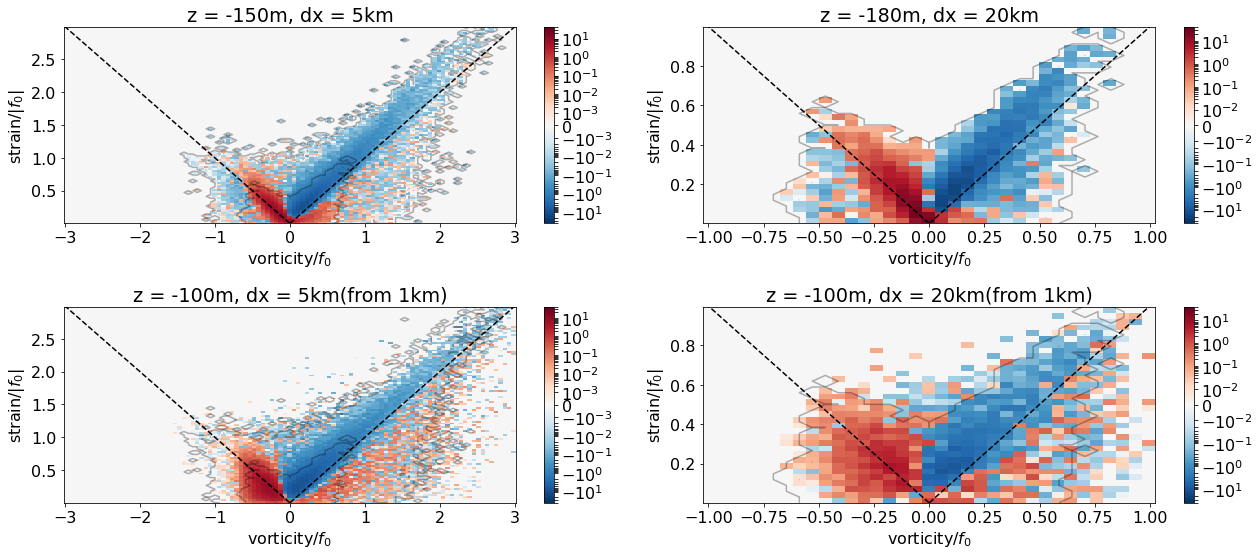

In [34]:
plt.figure(figsize=(18,8))


plt.subplot(221)
girbNums05 = len(vort_05_0.YC)*len(strain_05_0.XC)
(86400/(binbox01*girbNums05)*(hist05_wc150.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3))).plot(vmax=40,norm=cols.SymLogNorm(1e-3), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums05)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-3,10),np.linspace(0,3,10),'k--')
plt.plot(np.linspace(0,3),np.linspace(0,3),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('z = -150m, dx = 5km')



plt.subplot(222)
girbNums20 = len(vort_20_0.YC)*len(strain_20_0.XC)
(86400/(binbox01*girbNums20)*(hist20_wc180.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1))).plot(vmax=40,norm=cols.SymLogNorm(1e-2), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-1,29),np.linspace(0,1,29),'k--')
plt.plot(np.linspace(0,1),np.linspace(0,1),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('z = -180m, dx = 20km')


plt.subplot(223)
girbNums05 = len(vort_05_0.YC)*len(strain_05_0.XC)
(86400/(binbox01*girbNums05)*(hab05_cg_flux.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3))).plot(vmax=40,norm=cols.SymLogNorm(1e-3), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums05)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-3,10),np.linspace(0,3,10),'k--')
plt.plot(np.linspace(0,3),np.linspace(0,3),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('z = -100m, dx = 5km(from 1km)')



plt.subplot(224)
girbNums20 = len(vort_20_0.YC)*len(strain_20_0.XC)
(86400/(binbox01*girbNums20)*(hab20_cg_flux.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1))).plot(vmax=40,norm=cols.SymLogNorm(1e-2), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),(1/(binbox01*girbNums20)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-1,29),np.linspace(0,1,29),'k--')
plt.plot(np.linspace(0,1),np.linspace(0,1),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('z = -100m, dx = 20km(from 1km)')

plt.tight_layout()


In [38]:
hab05_cg = xr.open_dataarray('hab05_cg')
hab20_cg = xr.open_dataarray('hab20_cg')
hab05_cg_flux = xr.open_dataarray('hab05_cg_flux')
hab20_cg_flux = xr.open_dataarray('hab20_cg_flux')

In [39]:
setNum = 80

refer1 = ((1**2)/(binbox01*2000*1000)*hist01)
pgrid1 = np.logspace(np.log10(refer1.max()),-5,setNum)

refer5 = ((5**2)/(binbox01*2000*1000)*hist05)
refer20 = ((20**2)/(binbox01*2000*1000)*hist20)

verflux5_1 = []
verflux5_cg = []
verflux20_1 = []
verflux20_cg = []
verflux1 = []
verProb1 = []
verProb5 = []
verProb20 = []


for i in range(setNum):
    
    mask_pr1 = xr.where(refer1<pgrid1[i],0,1)
    verflux1.append( (1000**2*hist01_wc100*mask_pr1).mean(dim='time').sum() )
    verProb1.append((refer1*mask_pr1*binbox01).mean(dim='time').sum())
    verflux5_1.append( ((1000**2*25*hist05_wc150.mean(dim='time'))*mask_pr1.mean(dim='time')).sum() )
    verflux5_cg.append( ((1000**2*25*hab05_cg_flux.mean(dim='time'))*mask_pr1.mean(dim='time')).sum() )
    verflux20_1.append( (1000**2*400*hist20_wc180.mean(dim='time')*mask_pr1.mean(dim='time')).sum() )
    verflux20_cg.append( (1000**2*400*hab20_cg_flux.mean(dim='time')*mask_pr1.mean(dim='time')).sum() )


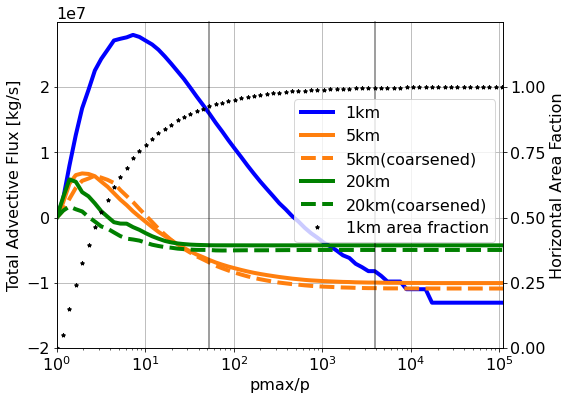

In [40]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_xlabel('pmax/p')
ax1.set_ylabel('Total Advective Flux [kg/s]')

ln1 = ax1.plot((refer1.max().values)*(1/pgrid1),verflux1, color='b', linewidth = 4)
ln2 = ax1.plot((refer1.max().values)*(1/pgrid1),verflux5_1, color='C1', linewidth = 4)
ln3 = ax1.plot((refer1.max().values)*(1/pgrid1),verflux5_cg,'C1--', linewidth = 4)
ln4 = ax1.plot((refer1.max().values)*(1/pgrid1),verflux20_1,'g', linewidth = 4)
ln5 = ax1.plot((refer1.max().values)*(1/pgrid1),verflux20_cg,'g--', linewidth = 4)
ax1.set_xscale('log')
ax1.set_ylim((-2e7,3e7))
ax1.set_xlim((1,1e5+1e4))
ax1.set_yticks([-20000000.0, -10000000.0,0.0,  10000000.0,  20000000.0])
ax1.grid()
ax1.plot((refer1.max().values)*(1/pgrid1[50])+np.linspace(-15,30,20)*0,np.linspace(-2e7,3e7,20),'k',clip_on=False,alpha = .5)
ax1.plot((refer1.max().values)*(1/pgrid1[24])+np.linspace(-15,30,20)*0,np.linspace(-2e7,3e7,20),'k',clip_on=False,alpha = .5)


ax2 = ax1.twinx() 
ax2.set_ylabel('Horizontal Area Faction')
ln6 = ax2.plot((refer1.max().values)*(1/pgrid1),verProb1,'k*',markersize = 4)
ax2.set_ylim((0,1.25))
ax2.set_yticks([0., 0.25, 0.5, 0.75, 1])
# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))



lnt = ln1+ln2+ln3+ln4+ln5+ln6
ax1.legend(lnt,['1km','5km','5km(coarsened)','20km','20km(coarsened)', '1km area fraction'],bbox_to_anchor=(0, .3, 1., .102),loc = 'best')